In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
train_data = pd.read_csv('volcanoesvenus/Volcanoes_train/train_images.csv', header=None)
train_labels = pd.read_csv('volcanoesvenus/Volcanoes_train/train_labels.csv')

test_data = pd.read_csv('volcanoesvenus/Volcanoes_test/test_images.csv', header=None)
test_labels = pd.read_csv('volcanoesvenus/Volcanoes_test/test_labels.csv')

In [3]:
train_data.head() 
#each row is now an image. columns are pixels. 12100 columns (all the 110 rows of 110 columns).
#row 1 consisting of 110 columns, row 2 consisting of 110 columns, etc...

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115


In [4]:
scaler = preprocessing.MinMaxScaler()

train_data = pd.DataFrame(scaler.fit_transform(train_data))
test_data = pd.DataFrame(scaler.fit_transform(test_data))

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


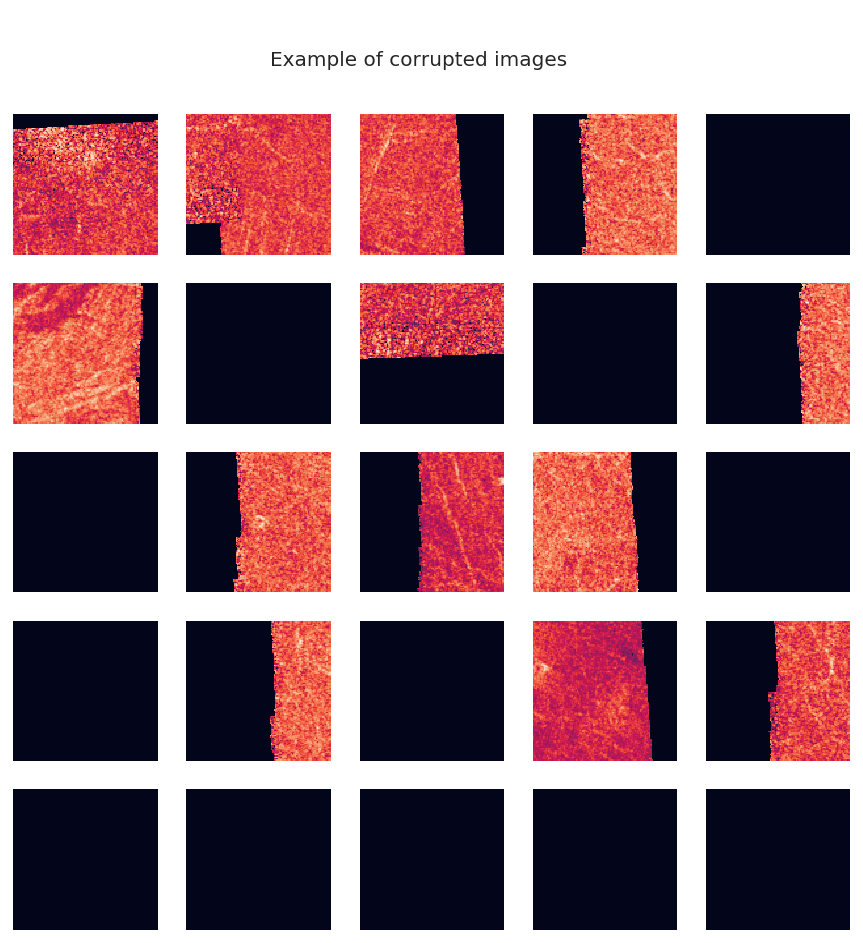

In [5]:
index_corrupt = train_data.loc[(train_data==0).any(axis=1)].index

plt.figure(figsize=(15,15))
plt.suptitle('\n\nExample of corrupted images', size=20) 
for i, val in enumerate(index_corrupt[:25]):
    plt.subplot(5,5,i+1)
    sns.heatmap(np.array(train_data.iloc[val]).reshape(110,110), 
                cbar=False, xticklabels=False, yticklabels=False)
plt.show()

In [6]:
#removing any corrupted data - for now, lets remove any image that has any 0 pixel value.
#setting X and y for training 

#taking all pixel values except for the rows which contain any 0 pixel value
Xtrain = train_data.loc[~(train_data==0).any(axis=1)] 
Xtrain = Xtrain.reset_index(drop=True)


train_labels_drop = train_labels.drop(index_corrupt, 0)
train_labels_drop = train_labels_drop.reset_index(drop=True)
train_labels_drop.fillna(value=0,inplace=True)

#binary outcome
ytrain = train_labels_drop['Volcano?']

In [7]:
print('There are {} corrupted images of {} images\n'.format(len(train_data) - len(Xtrain), len(train_data)))
print(Xtrain.head())
print(ytrain.head())

There are 271 corrupted images of 7000 images

      0         1         2         3         4         5         6      \
0  0.500000  0.543011  0.532258  0.547872  0.494792  0.450262  0.487310   
1  0.478947  0.494624  0.489247  0.473404  0.479167  0.486911  0.487310   
2  0.457895  0.376344  0.387097  0.393617  0.437500  0.408377  0.472081   
3  0.600000  0.634409  0.666667  0.632979  0.494792  0.617801  0.532995   
4  0.415789  0.510753  0.483871  0.436170  0.380208  0.387435  0.390863   

      7         8         9        ...        12090     12091     12092  \
0  0.440594  0.346535  0.530612    ...     0.557789  0.563158  0.500000   
1  0.500000  0.529703  0.530612    ...     0.517588  0.484211  0.505435   
2  0.514851  0.524752  0.540816    ...     0.422111  0.373684  0.516304   
3  0.574257  0.608911  0.571429    ...     0.582915  0.594737  0.554348   
4  0.371287  0.405941  0.443878    ...     0.452261  0.421053  0.429348   

      12093     12094     12095     12096     12097

In [8]:
#removing any corrupted data - for now, lets remove any image that has any 0 pixel value.
#setting X and y for testing 
index_corrupt = test_data.loc[(test_data==0).any(axis=1)].index

Xtest = test_data.loc[~(test_data==0).any(axis=1)]
Xtest = Xtest.reset_index(drop=True)

test_labels_drop = test_labels.drop(index_corrupt, 0)
test_labels_drop = test_labels_drop.reset_index(drop=True)
test_labels_drop.fillna(value=0,inplace=True)

#binary outcome
ytest = test_labels_drop['Volcano?']

print('There are {} corrupted images of {} images\n'.format(len(test_data) - len(Xtest), len(test_data)))
print(Xtest.head())
print(ytest.head())

There are 107 corrupted images of 2734 images

      0         1         2         3         4         5         6      \
0  0.569149  0.640884  0.574468  0.528796  0.594444  0.622857  0.574468   
1  0.494681  0.524862  0.521277  0.523560  0.500000  0.571429  0.574468   
2  0.574468  0.596685  0.489362  0.607330  0.644444  0.800000  0.670213   
3  0.877660  0.906077  0.829787  0.832461  0.838889  0.685714  0.547872   
4  0.558511  0.585635  0.446809  0.602094  0.672222  0.588571  0.500000   

      7         8         9        ...        12090     12091     12092  \
0  0.607735  0.534759  0.579787    ...     0.587302  0.632184  0.561856   
1  0.541436  0.481283  0.547872    ...     0.455026  0.534483  0.304124   
2  0.574586  0.598930  0.547872    ...     0.624339  0.637931  0.582474   
3  0.629834  0.609626  0.617021    ...     0.365079  0.551724  0.561856   
4  0.596685  0.550802  0.484043    ...     0.486772  0.511494  0.494845   

      12093     12094     12095     12096     12097

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


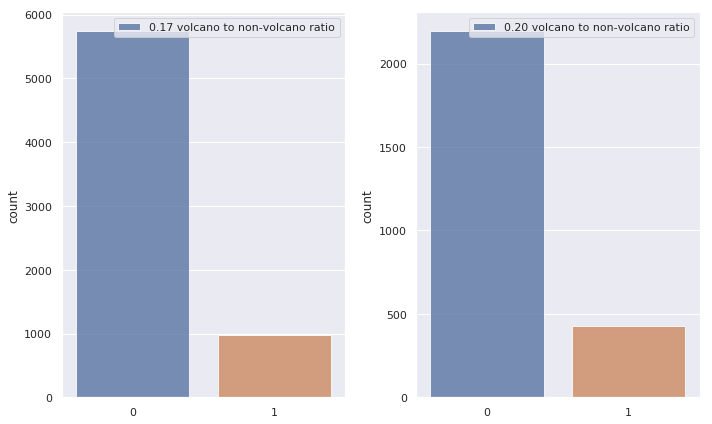

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

diff_train = np.sum(ytrain.values == 1)/np.sum(ytrain.values == 0)
diff_test = np.sum(ytest.values == 1)/np.sum(ytest.values == 0)

sns.countplot(x=ytrain.values, y=None, alpha=.8, ax=ax[0], 
              label=('{:.2f} volcano to non-volcano ratio'.format(diff_train)))
sns.countplot(x=ytest.values, y=None, alpha=.8, ax=ax[1], 
              label=('{:.2f} volcano to non-volcano ratio'.format(diff_test)))

ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.tight_layout()
fig.show()

#note this is an example of class imbalance

This shows class imbalance. If my model predicts no volcanos at all, then my $R^2$ could still be at 83% on the train data. 

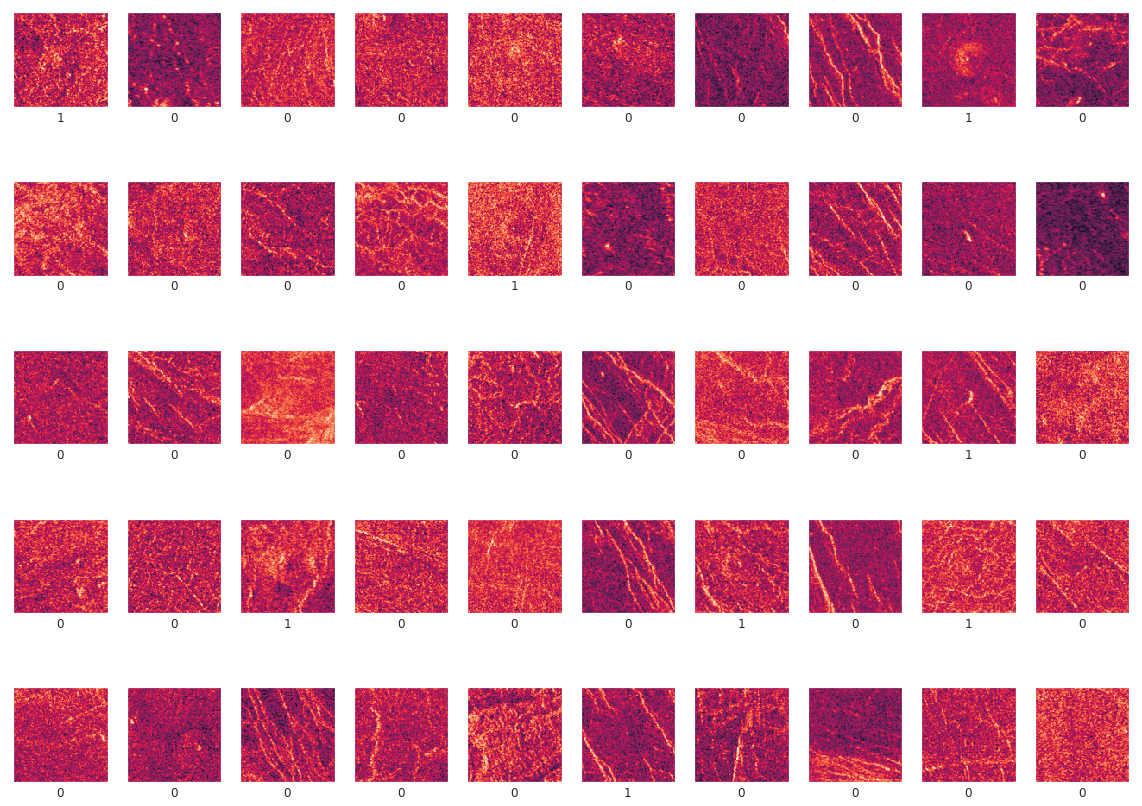

In [10]:
fig, ax = plt.subplots(5, 10, figsize=(20,15))
for i, axi in enumerate(ax.flat):
    axi.imshow(np.array(Xtrain.iloc[i]).reshape(110,110))
    axi.set(xticks=[], yticks=[],
           xlabel=ytrain[i])

plt.show()

In [11]:
values = np.linspace(0.01, 1, 10)

train_score = []
test_score = []

cv_train = []
cv_test = []

for val in values:
    lr = LogisticRegression(penalty='l1', solver='liblinear', C=val)
    lr.fit(Xtrain, ytrain)
    
    train_score.append(lr.score(Xtrain, ytrain))
    test_score.append(lr.score(Xtest, ytest))
    
    cv_train.append(np.mean(cross_val_score(lr, Xtrain, ytrain, cv=5)))
    cv_test.append(np.mean(cross_val_score(lr, Xtest, ytest, cv=5)))
    
train_score = np.array(train_score)
test_score = np.array(test_score)

cv_train = np.array(cv_train)
cv_test = np.array(cv_test)

In [12]:
diff = train_score - test_score
print(diff.min())

0.015020068639152728


In [13]:
values

array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])

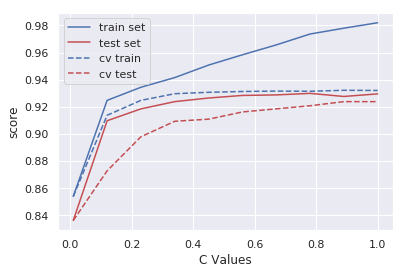

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(values, train_score, label='train set', c='b')
plt.plot(values, test_score, label='test set', c='r')

plt.plot(values, cv_train, '--', label='cv train', c='b')
plt.plot(values, cv_test, '--', label='cv test', c='r')

plt.xlabel('C Values')
plt.ylabel('score')
plt.legend(loc='best')

plt.savefig('LR Lasso C value plot')
plt.show()
plt.tight_layout()

In [15]:
lasso_lr = LogisticRegression(C=0.3, penalty='l1', solver='liblinear') #default solver is liblinear. f
#or L1 penalty - liblinear or saga. saga better for larger datasets

# Fit the model.
lasso_fit = lasso_lr.fit(Xtrain, ytrain)

In [16]:
# Display.
print('Coefficients')
print(lasso_fit.coef_)
print('Intercept')
print(lasso_fit.intercept_)
pred_y_lasso = lasso_lr.predict(Xtrain)

print('\n Accuracy')
print(pd.crosstab(pred_y_lasso, ytrain))

print('\n Percentage accuracy')
print(lasso_lr.score(Xtrain, ytrain))

print(' \n cross validation')
lasso_cv = cross_val_score(lasso_lr, Xtrain, ytrain, cv=5)
print(lasso_cv)
print('{:.4}% +/- {:.3}'.format(lasso_cv.mean()*100, np.std(lasso_cv)*200))

Coefficients
[[0. 0. 0. ... 0. 0. 0.]]
Intercept
[-1.04034106]

 Accuracy
Volcano?     0    1
row_0              
0         5692  357
1           55  625

 Percentage accuracy
0.9387724773369
 
 cross validation
[0.922049   0.92724573 0.93457249 0.92118959 0.93011152]
92.7% +/- 1.0


In [17]:
pred_y_lasso = lasso_lr.predict(Xtest)

print('\n Accuracy')
print(pd.crosstab(pred_y_lasso, ytest))

print('\n Percentage accuracy')
print(lasso_lr.score(Xtest, ytest))

print(' \n cross validation')
lasso_cv_test = cross_val_score(lasso_lr, Xtest, ytest, cv=5)
print(lasso_cv_test)
print('{:.4}% +/- {:.3}'.format(lasso_cv_test.mean()*100, np.std(lasso_cv_test)*200))


 Accuracy
Volcano?     0    1
row_0              
0         2170  171
1           27  259

 Percentage accuracy
0.924628854206319
 
 cross validation
[0.90494297 0.90114068 0.89333333 0.91809524 0.91238095]
90.6% +/- 1.73


In [18]:
yfit = lasso_lr.predict(Xtest)
trainfit = lasso_lr.predict(Xtrain)
testscore = lasso_lr.score(Xtest, ytest)
trainscore = lasso_lr.score(Xtrain, ytrain)
print(trainscore)
print(testscore)

0.9387724773369
0.924628854206319


In [19]:
cv_train = cross_val_score(lasso_lr, Xtrain, ytrain, cv=5)
print(np.mean(cv_train))

cv_test = cross_val_score(lasso_lr, Xtest, ytest, cv=5)
print(np.mean(cv_test))

0.9280732344767252
0.907119319210574


In [20]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=('No Volcano - 0', 'Volcano - 1')))

                precision    recall  f1-score   support

No Volcano - 0       0.93      0.99      0.96      2197
   Volcano - 1       0.91      0.60      0.72       430

     micro avg       0.92      0.92      0.92      2627
     macro avg       0.92      0.80      0.84      2627
  weighted avg       0.92      0.92      0.92      2627



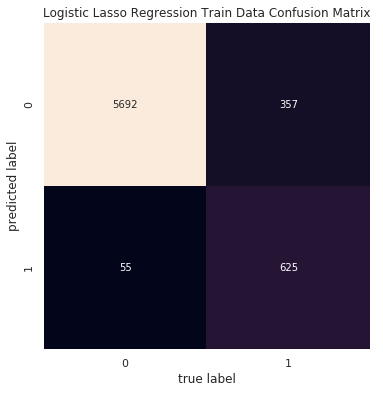

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytrain, trainfit)
plt.figure(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Logistic Lasso Regression Train Data Confusion Matrix')

plt.savefig('Logistic Lasso Regression Train Data Confusion Matrix')

plt.show()

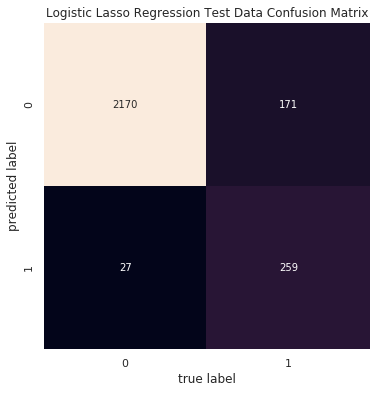

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
plt.figure(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Logistic Lasso Regression Test Data Confusion Matrix')

plt.savefig('Logistic Lasso Regression Test Data Confusion Matrix')
plt.show()

In [23]:
# Accuracy tables.
table_train = pd.crosstab(ytrain, trainfit, margins=True)
train_tI_errors = table_train.loc[0.0,1.0]/table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0]/table_train.loc['All','All']

print((
    'Train set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors))

# Accuracy tables.
table_test = pd.crosstab(ytest, yfit, margins=True)
test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(test_tI_errors, test_tII_errors))

Train set accuracy:
Percent Type I errors: 0.008173577054540051
Percent Type II errors: 0.053053945608559964
Test set accuracy:
Percent Type I errors: 0.010277883517320136
Percent Type II errors: 0.06509326227636086
